In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/fashion_mnist") #更改路徑
os.getcwd() #查看當前路徑

'/content/drive/My Drive/fashion_mnist'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('fashion-mnist_train_data.csv')
test_data = pd.read_csv('fashion-mnist_test_data.csv')
train_label = pd.read_csv('fashion-mnist_train_label.csv')
test_label = pd.read_csv('fashion-mnist_test_label.csv')


In [ ]:
train_data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(60000, 784)

In [ ]:
X_train = train_data.to_numpy()
X_train = X_train.reshape(60000, 28, 28, 1)

X_test = test_data.to_numpy()
X_test = X_test.reshape(10000, 28, 28, 1)

labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [ ]:
y_train = train_label['label']
y_test = test_label['label']

In [ ]:
import matplotlib.pyplot as plt

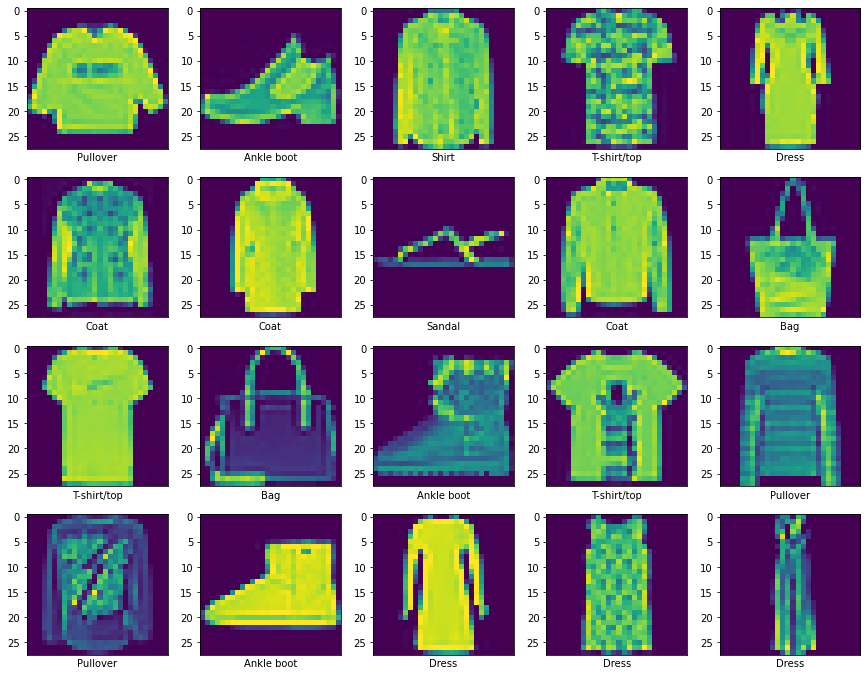

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.xlabel(labels[y_train[i]])
    plt.imshow(X_train[i].reshape(28, 28))

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(216, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
938/938 [==============================] - 122s 129ms/step - loss: 0.7408 - accuracy: 0.7257 - val_loss: 0.3559 - val_accuracy: 0.8689
Epoch 2/20
938/938 [==============================] - 120s 128ms/step - loss: 0.3662 - accuracy: 0.8657 - val_loss: 0.2715 - val_accuracy: 0.9012
Epoch 3/20
938/938 [==============================] - 120s 128ms/step - loss: 0.3211 - accuracy: 0.8828 - val_loss: 0.2507 - val_accuracy: 0.9055
Epoch 4/20
938/938 [==============================] - 120s 127ms/step - loss: 0.2845 - accuracy: 0.8943 - val_loss: 0.2336 - val_accuracy: 0.9116
Epoch 5/20
938/938 [==============================] - 119s 127ms/step - loss: 0.2611 - accuracy: 0.9023 - val_loss: 0.2183 - val_accuracy: 0.9174
Epoch 6/20
938/938 [==============================] - 119s 127ms/step - loss: 0.2391 - accuracy: 0.9132 - val_loss: 0.2068 - val_accuracy: 0.9197
Epoch 7/20
938/938 [==============================] - 120s 127ms/step - loss: 0.2283 - accuracy: 0.9173 - val_loss: 0.2132 -

In [ ]:
model.save("fashion_Minst3.h5")

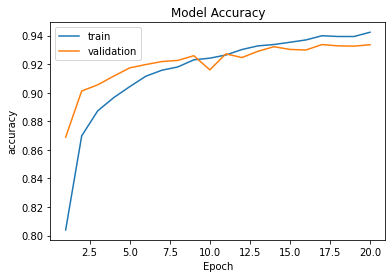

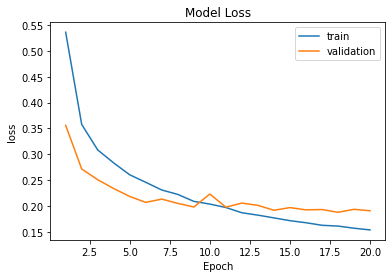

In [ ]:
plt.title('Model Accuracy')
plt.plot(range(1, 21), history.history['accuracy'])
plt.plot(range(1, 21), history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1, 21),history.history['loss'])
plt.plot(range(1, 21),history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

In [ ]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.1906 - accuracy: 0.9336


[0.19062146544456482, 0.9336000084877014]